# Análisis Exploratorio de los datos

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import datetime
import matplotlib.pyplot as plt

from scipy.stats import bartlett, pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt



## Mount Drive Gaston

In [ ]:
# mount drive Gastón
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/Aprendizaje"
!ls

Mounted at /content/drive/
drive  sample_data
[Errno 2] No such file or directory: '/content/drive/MyDrive/Aprendizaje'
/content
drive  sample_data


## Mount Drive Adela

In [2]:
# mount drive Adela
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/6-2-C/AA/P1/Data"
!ls


Mounted at /content/drive/
drive  sample_data
/content/drive/MyDrive/6-2-C/AA/P1/Data
comp_st27ns1.txt.bz2  disp_st27ns1.txt.bz2


In [3]:
disp_df = pd.read_csv("disp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)
comp_df = pd.read_csv("comp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)

In [ ]:
disp_df.head(5)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600


In [ ]:
disp_df.tail(5)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900
V4380,0.000000,0.000000,0.000000,0.000000,0.000000,265.567166,260.618000,269.315979,287.204010,284.632593,...,243.261454,245.428872,258.173867,258.030846,0.0,9.454545,42.727273,90.727273,59.181818,11047800


In [ ]:
disp_df.shape

(4380, 76)

In [ ]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.680864,0.295715,0.560493,0.314416,0.633132,313.273646,315.987828,323.916601,343.364923,342.400159,...,244.622084,249.168372,259.334746,258.017321,0.161146,39.177252,73.645019,117.929556,90.196824,1.563380e+07
std,2.428075,1.150189,2.004093,1.052649,2.046562,55.814758,58.638442,59.902811,63.252590,63.356754,...,37.643788,37.682334,41.063270,40.327808,0.359916,26.040578,31.372578,43.613978,35.478830,8.034871e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,155.153588,152.214722,156.433634,168.872932,169.850136,...,112.273223,120.532820,108.696960,113.352032,0.000000,0.000000,2.000000,4.181818,2.727273,2.367000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,267.695476,267.413078,275.156984,292.641835,291.756962,...,227.328584,230.584259,239.253765,238.054149,0.000000,14.886364,50.181818,98.181818,65.545455,9.617175e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.375947,322.670428,329.227325,346.983034,345.283217,...,249.642644,254.083740,266.566240,264.581923,0.000000,36.409091,78.000000,126.090909,95.272727,1.556790e+07
75%,0.151818,0.071136,0.176364,0.074773,0.171136,362.370395,367.887140,377.571733,399.169037,398.387048,...,273.364252,277.758348,289.760780,288.576924,0.000000,62.477273,99.909091,144.636364,118.181818,2.253825e+07
max,49.250909,22.713636,32.225454,14.722727,31.407273,419.721752,425.380085,428.193354,473.704812,467.151586,...,310.361004,315.971533,331.714963,328.803999,1.000000,91.272727,274.272727,547.545455,363.818182,3.145350e+07


In [ ]:
disp_df.dtypes

apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
               ...   
uswrf_s2_1    float64
uswrf_s3_1    float64
uswrf_s4_1    float64
uswrf_s5_1    float64
salida          int64
Length: 76, dtype: object

In [ ]:
disp_df.count

<bound method DataFrame.count of        apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  279.583582   
V2       0.000000    0.000000    0.010000    0.056364    0.332727  241.907687   
V3       0.372727    0.021818    0.044545    0.010000    0.007273  266.370911   
V4       0.002727    0.004545    0.000000    0.000000    0.000000  246.863048   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  225.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.103636    0.031818    0.275455    1.363636    2.723636  290.259560   
V4377    0.042727    0.011818    0.005455    0.000000    0.000000  281.187456   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  258.991619   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  267.316595   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  265.56716

In [7]:
disp_df_unicos = disp_df.drop_duplicates()
disp_df_unicos.shape

print(disp_df.iloc[:, -1:])

         salida
V1     10814100
V2      3524700
V3      2262300
V4      2414100
V5      8925600
...         ...
V4376   2586300
V4377   7096500
V4378  10694700
V4379  11154900
V4380  11047800

[4380 rows x 1 columns]


## Separación en ínidices Miguel Ángel T3


In [16]:
X = disp_df.iloc[:, :75]
y = disp_df.iloc[:, -1:]
X_train, X_test = np.array_split(X, [3650])
y_train, y_test = np.array_split(y, [3650]) #4380-730

# The indices which have the value -1 will be kept in train.
train_indices = np.full((2920,), -1, dtype=int) # 8 years

# The indices which have zero or positive values, will be kept in validation
val_indices = np.full((730,), 0, dtype=int) # 2 years
test_fold = np.append(train_indices, val_indices)



print("Train Val")
print(train_indices)
print("Indices Val")
print(val_indices)
print("Test Val")
print(test_fold)
print(len(test_fold))

print(X_train)

Train Val
[-1 -1 -1 ... -1 -1 -1]
Indices Val
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [24]:
#Creamos el conjunto de entrenamiento separando X e Y

#Columnas con datos de entrada
input_cols = disp_df.columns[:75]
#Número de filas correspondiente a los 8 primeros años - Entrenamiento
n_rows_train = int((disp_df_unicos.shape[0]*8)/12)

#Creamos el subset para entrenamiento
subset_df = disp_df.iloc[:n_rows_train]

#Datos de entrada y salida subset de entrenamiento
X_train_df = subset_df.iloc[:, :75]
y_train_df = subset_df.iloc[:, -1:]


#Conjunto de entrenamiento de X
print(X_train_df.shape)
print(X_train_df.head(5))
X_train_df.tail(5)


#Conjunto de entrenamiento de y
y_train_df.shape
y_train_df.head(5)
y_train_df.tail(5)

X_train_df.head(5)

print(X_train_df)
print(y_train_df)

# Crear el conjunto de validación 
#Número de filas correspondiente a los 2 años - Validación
n_rows_val = int((disp_df_unicos.shape[0]*2)/12)
print(n_rows_val)

start_index = disp_df_unicos.shape[0] - (n_rows_val*2)
end_index = disp_df_unicos.shape[0] - (n_rows_val)
subset_val_df = disp_df.iloc[start_index:end_index:,:]

print(subset_val_df)
X_val_df = subset_val_df.iloc[:, :75]
y_val_df = subset_val_df.iloc[:, -1:]

print(X_val_df)
print(y_val_df)





(2920, 75)
    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  279.583582   
V2    0.000000    0.000000    0.010000    0.056364    0.332727  241.907687   
V3    0.372727    0.021818    0.044545    0.010000    0.007273  266.370911   
V4    0.002727    0.004545    0.000000    0.000000    0.000000  246.863048   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  225.253657   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t1_1  \
V1  244.150732  248.810849  260.377672  257.922896  ...  192.516803   
V2  273.096852  289.982095  317.169015  309.656355  ...  231.473054   
V3  248.814203  253.860367  269.438213  262.840130  ...  210.473835   
V4  254.987450  253.493584  243.910921  238.531321  ...  227.330324   
V5  233.381596  241.669004  262.122700  262.209190  ...  229.641681   

    ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  \
V1  246.504475 

In [20]:
#Ahora creamos el conjunto de test de manera manual

n_rows_test = int((disp_df_unicos.shape[0]*2)/12)

test_df = disp_df.iloc[-n_rows_test:, :]
print(test_df)

input_cols = disp_df.columns[:75]
output_col = disp_df.columns[-1]


X_test_df = test_df.loc[:, input_cols]
y_test_df = test_df.loc[:, output_col]


#----------------------------------
#comprobamos que funcione correctamente

#Conjunto de Validación de X
X_test_df.shape
X_test_df.head(5)
X_test_df.tail(5)


#Conjunto de Validación de y
y_test_df.shape
y_test_df.head(5)
y_test_df.tail(5)




       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V3651    0.000000    0.000000    0.000000    0.000000    0.000000  223.426755   
V3652    0.000000    0.000000    0.000000    0.000000    0.000000  240.940893   
V3653    0.190909    0.235455    1.545455    3.620000    4.291818  334.705547   
V3654    0.372727    0.080000    0.152727    0.033636    0.067273  382.270236   
V3655    0.170909    0.088182    0.311818    0.426364    1.251818  367.165677   
...           ...         ...         ...         ...         ...         ...   
V4376    0.103636    0.031818    0.275455    1.363636    2.723636  290.259560   
V4377    0.042727    0.011818    0.005455    0.000000    0.000000  281.187456   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  258.991619   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  267.316595   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  265.567166   

       dlwrf_s2_1  dlwrf_s3

V4376     2586300
V4377     7096500
V4378    10694700
V4379    11154900
V4380    11047800
Name: salida, dtype: int64

Parte 2


In [ ]:
disp_df.describe()

#Por si sirve de algo

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.680864,0.295715,0.560493,0.314416,0.633132,313.273646,315.987828,323.916601,343.364923,342.400159,...,244.622084,249.168372,259.334746,258.017321,0.161146,39.177252,73.645019,117.929556,90.196824,1.563380e+07
std,2.428075,1.150189,2.004093,1.052649,2.046562,55.814758,58.638442,59.902811,63.252590,63.356754,...,37.643788,37.682334,41.063270,40.327808,0.359916,26.040578,31.372578,43.613978,35.478830,8.034871e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,155.153588,152.214722,156.433634,168.872932,169.850136,...,112.273223,120.532820,108.696960,113.352032,0.000000,0.000000,2.000000,4.181818,2.727273,2.367000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,267.695476,267.413078,275.156984,292.641835,291.756962,...,227.328584,230.584259,239.253765,238.054149,0.000000,14.886364,50.181818,98.181818,65.545455,9.617175e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.375947,322.670428,329.227325,346.983034,345.283217,...,249.642644,254.083740,266.566240,264.581923,0.000000,36.409091,78.000000,126.090909,95.272727,1.556790e+07
75%,0.151818,0.071136,0.176364,0.074773,0.171136,362.370395,367.887140,377.571733,399.169037,398.387048,...,273.364252,277.758348,289.760780,288.576924,0.000000,62.477273,99.909091,144.636364,118.181818,2.253825e+07
max,49.250909,22.713636,32.225454,14.722727,31.407273,419.721752,425.380085,428.193354,473.704812,467.151586,...,310.361004,315.971533,331.714963,328.803999,1.000000,91.272727,274.272727,547.545455,363.818182,3.145350e+07


Correlación


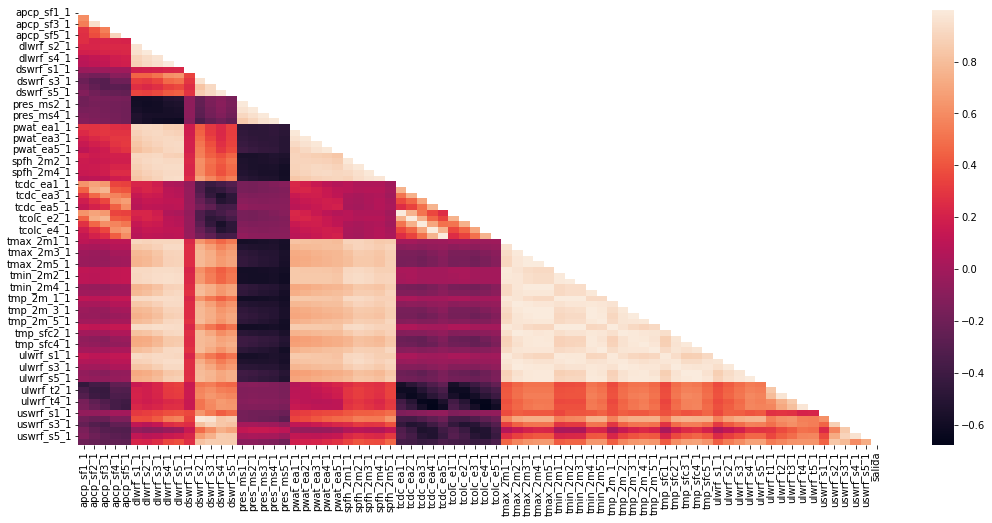

Estadístico de prueba: 7751358.776000544
Valor p: 0.0


0.0

In [ ]:
# CORRELACION DE VARIABLES
def cor_matrix(df):
    #cor = disp_df.corr()[abs(disp_df.corr()) > 0.6]
    cor = disp_df.corr()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(18, 8))
    sns.heatmap(cor, mask=mask, annot=False)
    plt.show()

cor_matrix(disp_df)

# realizar el test de Bartlett
statistic, pvalue = bartlett(*disp_df.T.values)

# imprimir los resultados
print("Estadístico de prueba:", statistic)
print("Valor p:", pvalue)
pvalue
#aqui podemos ver que se rechaza la hipotesis nula de que es la matriz identidad, hay multicolinealidad, hay que eliminarla


In [ ]:
# VISUALIZACION DE VARIABLES

#aquí tenemos que hacer alguna grafica para ver como van las variables
mom_1 = [disp_df.columns[i] for i in range(0, len(disp_df.columns), 5)]
#sns.pairplot(disp_df[mom_1])

sns.pairplot(disp_df)

## K - NN

### Data Preparation

Para usar K-NN se debe preparar los datos correctamente. Las técnicas de aprendizaje automático que se basan en la medición de distancias, como las redes de neuronas, el k-NN y el SVM, requieren que los atributos estén rescalados para evitar que el atributo con mayor rango de valores tenga una influencia desproporcionada en la medida de distancia.

In [ ]:
# Estandarizamos los datos de entrada

ss = StandardScaler()

X_data_set_estandar = ss.fit_transform(X_train_df)
X_train_df_estandar = pd.DataFrame(X_data_set_estandar)

print(X_train_df_estandar)

# Here, we set our model to KNN with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# We train it
clf.fit(X_train_df_estandar, y_train_df)

# We obtain predictions on the test set
y_test_pred = clf.predict(X_test_df)

# We compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the KNN: {accuracy_knn}")

# We finally compute the final model with all available data
final_clf = KNeighborsClassifier(n_neighbors=5)
final_clf.fit(X, y)


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, y_test_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
sns.heatmap(cnf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g') # font size



            0         1         2         3         4         5         6   \
0    -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -0.607688 -1.228871   
1    -0.294642 -0.255085 -0.270946 -0.248605 -0.153840 -1.279998 -0.734915   
2    -0.141169 -0.236787 -0.254519 -0.291479 -0.304275 -0.843463 -1.149291   
3    -0.293519 -0.251273 -0.275702 -0.300726 -0.307636 -1.191572 -1.043946   
4    -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.577182 -1.412643   
...        ...       ...       ...       ...       ...       ...       ...   
2915 -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.977959 -2.096302   
2916 -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.888606 -2.134612   
2917 -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.476844 -1.403693   
2918 -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.548013 -1.551605   
2919 -0.294642 -0.255085 -0.275702 -0.300726 -0.307636 -1.712972 -2.044118   

            7         8         9   ...        65        66    

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy of the KNN: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
